In [ ]:
import numpy as np
import pylab as plt

<br><b><span style="font-size: 25px;">HW3: Transmission line resonators (15 points)</span></b>

# Single transmission line

Transmission line can be fought of as series of sections, each containing a resistance $R$, inductance $L$, conductance $G$ and capacitance $C$:
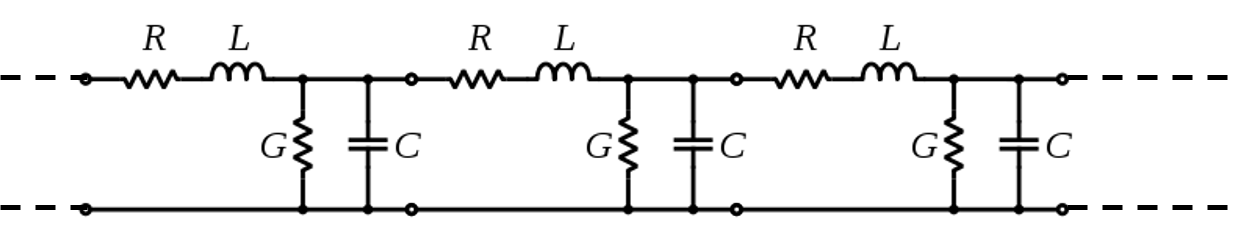
By applying Kirchoff’s laws and taking the continuous limit, we can obtain the Telegrapher's equations:<br><br>
$$\frac{\partial V(z)}{\partial z} + (R + i\omega L) I(z) = 0,$$<br>
$$\frac{\partial I(z)}{\partial z} + (G + i\omega C) V(z) = 0.$$<br>
where all values for the elements are provided per unit length.<br><br>
We can separate the equations for $V(z)$ and $I(z)$:<br>
$$\frac{\partial^2 V (z)}{\partial z^2} -\gamma^2 V(z) = 0,$$<br>
$$\frac{\partial^2 I (z)}{\partial z^2} -\gamma^2 I(z) = 0,$$<br>
where $\gamma = \sqrt{(R+i\omega L)(G+i\omega C)}$ is called a <i>complex propagation constant</i>.<br><br>
By solving the equations, we can get that solutions are of the form:<br><br>
$$V(z) = V_0^+ e^{-\gamma z} + V_0^- e^{\gamma z},$$<br>
$$I(z) = I_0^+ e^{-\gamma z} + I_0^- e^{\gamma z}.$$<br>
Plugging them back into the original equations, we can also find the following relations:<br><br>
$$V_0^+ = Z_0 I_0^+, \;\;\;\;\; V_0^- = -Z_0 I_0^-,$$
where $Z_0 = \sqrt{\dfrac{R+i\omega L}{G+i\omega C}}$ is defined as a <i>characteristic impedance</i> of a line.

<b>Problem 1.1 (1.0 points)</b>
Consider a transmission line of length $l$ connected to the ideal <a href="https://en.wikipedia.org/wiki/Current_source">current source</a> $I_s \cos (\omega t)$ from the left end and shorted at the right end:
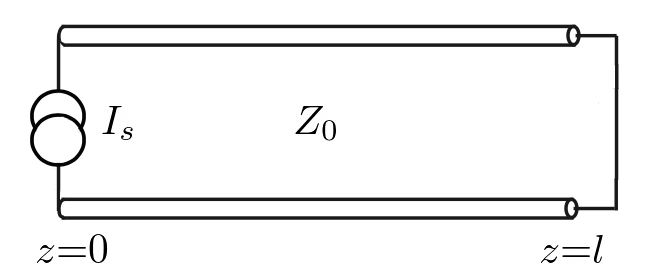<br>
Show that the impedance at the source $Z$ can be expressed as:
$$Z = Z_0 \frac{1-e^{-2\gamma l}}{1 + e^{-2\gamma l}},$$<br>
where $l$ is length of the line and $\sinh$, $\cosh$ denote hyperbolic sine and cosine respectively.

<b>Solution</b>

<b> Problem 1.2 (Spectrum) (3.0 points)</b> Let $P$ be the time-averaged power, which is absorbed by the transmission line. Plot the dependence of normalized power $P/I_s^2$ on the source frequency $\omega$ for the following parameters of transmission line:<br>
<table style="width: 500px;">
    <tr style="border: 1px solid black; background-color: transparent;"><th>$R$, $\Omega$</th><th>$L$, $\text{H}$</th><th>$G$, $\text{S}$</th><th>$C$, $\text{F}$</th></tr>
    <tr style="border: 1px solid black; background-color: transparent;"><td>$0.1$</td><td>$1$</td><td>$0.1$</td><td>$1$</td></tr>
    <tr style="border: 1px solid black; background-color: transparent;"><td>$10$</td><td>$10$</td><td>$0.1$</td><td>$1$</td></tr>
    <tr style="border: 1px solid black; background-color: transparent;"><td>$1$</td><td>$1$</td><td>$10$</td><td>$1$</td></tr>
</table><br>
Note, that you may need to adjust the frequency range in order to obtain reasonable plots. Any approximations to the form of impedance are prohibited.<br>
<i>Hint</i>: you can use <code>np.real</code> and <code>np.imag</code> functions, no need to derive formulas containing real and imaginary parts of impedance explicitly.<br>

<b>Solution</b>

In [ ]:
class TransmissionLine:
    """A convenient class describing transmission line"""
    
    def __init__(self, R, L, G, C):
        """
        Args:
            R (float): resistance of a line in Ohm
            L (float): inductance of a line H
            G (float): conductance of a line in S
            C (float): capacitance of a line in F
        """
        
        self.R = R
        self.L = L
        self.G = G
        self.C = C

In [ ]:
# Here we create transmission lines with given parameters

tl1 = TransmissionLine(R=0.1, L=1, G=0.1, C=1)
tl2 = TransmissionLine(R=10, L=10, G=0.1, C=1)
tl3 = TransmissionLine(R=1, L=1, G=10, C=1)

In [ ]:
def PowerSpectrum(omega, tl: TransmissionLine):
    """Gets the power spectrum of transmission line 
    as a function of frequency

    Args:
        omega (array): source frequency
        tl (TransmissionLine): transmission line parameters

    """

    # YOUR CODE HERE

In [ ]:
omega = # YOUR CODE HERE
p = PowerSpectrum(omega, tl1)
plt.plot(omega, p);

In [ ]:
omega = # YOUR CODE HERE
p = PowerSpectrum(omega, tl2)
plt.plot(omega, p);

In [ ]:
omega = # YOUR CODE HERE
p = PowerSpectrum(omega, tl3)
plt.plot(omega, p);

A <i>quality factor</i> for a resonant device can be defined as<br><br>
$$Q = \frac{\omega_r}{\Delta \omega},$$<br>
where $\omega_r$ is a <i>resonant frequency</i> (in which the normalized power spectrum is at the maximum) and $\Delta \omega$ is a <i>resonant width</i>, which is defined as a full width at a half maximum of the curve.

<b>Problem 1.3 (Quality factor I) (2.0 points)</b> Using the power spectrum for the first transmission line from the previous problem, find its quality factor at the first resonance.

In [ ]:
def QualityFactor(omega, power):
    """Get the quality factor of transmission line
    
    Args:
        omega (array): list of frequency values
        power (array): list of power values

    """
    
    # YOUR CODE HERE

In [ ]:
omega = # YOUR CODE HERE
p = PowerSpectrum(omega, tl1)
print("Q = {}".format(QualityFactor(omega, p)))

Another way to define the quality factor is
$$Q = \omega_r \frac{E}{P},$$<br>
where $\omega_r$ is a resonant frequency, $E$ is the time-averaged energy stored in the system and $P$ is the time-average of absorbed power at resonance. This definition is not exactly equivalent to the previous one but their numerical values are usually very close in the real-life systems. 

Lets examine the case of the parallel RLC circuit connected to the current source:
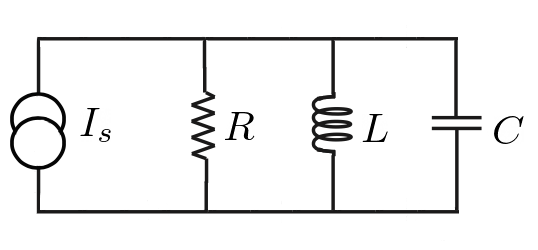

In the resonance $\omega_r = 1/\sqrt{LC}$, the current through the resistance is equal to the current of the source, and the time-averaged energy in the capacitor is equal to the one in the inductor:
$$\langle E_L \rangle = \langle E_C \rangle = \frac{CU^2}{4} = \frac{CR^2I_s^2}{4}.$$
Therefore, the quality factor is given by:
$$Q = \omega_r \frac{\langle E_L \rangle + \langle E_C \rangle}{\frac12 I_s^2 R} = \omega_r CR = R\sqrt{\frac{C}{L}}.$$

Surprisingly, the transmission line, described in the Problem 1.2 behaves like parallel RLC circuit near the resonance at the low-loss approximation ($\omega L \gg R$, $\omega C \gg G$). In order to show this, we can derive, that their impedances have the same form in the vicinity of the resonance frequency. The impedance of a parallel RLC circuit is equal to
$$Z_\text{in} = \frac{1}{1/R + 1/(i\omega L) + i\omega C}.$$
Let $\omega = \omega_r + \delta \omega$, where $\delta w \ll \omega_r$. In this case<br><br>
$$Z_\text{in} = \frac{1}{1/R + 1/(i(\omega_r + \delta w)L + i\omega_r C + i\delta \omega C} \approx \frac{1}{1/R - \dfrac{i}{\omega_r L} \left(1 - \dfrac{\delta \omega}{\omega_r} \right) + i\omega_r C + i\delta \omega C} = $$<br>
$$= \frac{1}{1/R + \dfrac{i\delta \omega}{\omega_r^2 L} + i\delta \omega C} = \frac{1}{1/R + 2i\delta \omega C} = \frac{R}{1 + 2iQ \dfrac{\delta \omega}{\omega_r}}.$$
Now we need to work out the case of transmission line.

<b>Problem 1.4 (2.0 points)</b> Show that in the low-loss approximation for the transmission line described in the Problem 1.2, the resonance frequencies are given by<br><br>
$$\omega_r = \frac{\pi}{l \sqrt{LC}} \left( n + \frac12 \right),\,\,\,n \in \mathbb{Z}^{\geq 0}.$$

<b>Solution:</b>

<b>Problem 1.5 (Quality factor II) (3.0 points)</b> Let $\omega = \omega_r + \delta \omega$, where $\delta \omega \ll \omega_r$. For the transmission line described in the Problem 1.2 in the low-loss approximation derive the expression for $Z_\text{in}$ near the resonance and using the analogy with RLC circuit show that the quality factor is equal to<br><br>
$$Q = \omega_r \left( \frac{R}{L} + \frac{G}{C} \right)^{-1},\,\,\,n \in \mathbb{Z}^{\geq 0}.$$
Compare your result with the problem 1.3.

<b>Solution:</b>

In [ ]:
def LowLossQualityFactor(tl: TransmissionLine):
    """Get the quality factor of transmission line 
        in the low-loss-approximation
    
    Args:
       tl (TransmissionLine): transmission line parameters

    """
    
    # YOUR CODE HERE

In [ ]:
print("Exact Q = {}".format(QualityFactor(omega, p)))
print("Low-loss Q = {}".format(LowLossQualityFactor(tl1)))

# Resonator-feedline coupling

In the real life systems transmission line resonators are coupled to the <i>feedline</i>, which is another transmission line. Such coupling results in easier determination of many important parameters and allows to work with several transmission line resonators simultaneously.

<table>
    <tr style="background-color: transparent;"><td><img src="https://dl.dropboxusercontent.com/s/lto2io0zpfvtplz/TLR.jpg" width="150px"/></td><td><img src="https://dl.dropboxusercontent.com/s/cz9cmfyaariq9zf/notch-port-scheme.png" width="400px"/></td></tr>
    <tr style="background-color: transparent;"><td><center>Picture of transmission line resonator coupled to the feedline</center></td><td><center>Schematic representation of the coupling</center></td></tr>
</table>

Such coupling is essentially a discontinuity which can be thought of as if it were two transmission lines. We will ignore the length-dependence of waves in both transmission lines. The characteristic impedance of a feedline $Z_{fl}$ is usually matched (equal) to impedances of the source and the load.

From matching between the source impedance and characteristic impedance of the (first) transmission line:<br><br>
$$V_\text{in} = V_\text{in}^+ + V_\text{in}^-,\quad Z_{fl} I_\text{in} = V_\text{in}^+ - V_\text{in}^-,\quad V_\text{in} = V_g - Z_{fl} I_\text{in}.$$
Therefore,
$$V_g = 2V_\text{in}^+.$$

From matching between the load impedance and characteristic impedance of the (second) transmission line:<br><br>
$$V_\text{out} = V_\text{out}^+ + V_\text{out}^-,\quad Z_0 I_\text{out} = V_\text{out}^+ - V_\text{out}^-,\quad V_\text{out} = Z_{fl} I_\text{out}.$$
Therefore,
$$V_\text{out}^- = 0.$$

The $S$-parameter matrix for the 2-port network is
$$\begin{pmatrix}V_\text{in}^-\\V_\text{out}^+\end{pmatrix} = \begin{pmatrix}S_{11}&S_{12}\\S_{21}&S_{22}\end{pmatrix}\begin{pmatrix}V_\text{in}^+\\V_\text{out}^-\end{pmatrix}$$

In our case:<br><br>
$$S_{11} = \frac{V_\text{in}^-}{V_\text{in}^+} = \frac{2V_\text{in}}{V_g} - 1,\qquad S_{21} = \frac{V_\text{out}^+}{V_\text{in}^+} = \frac{2V_\text{out}}{V_g}$$<br>
In this homework we will ignore the inductive coupling ($L_1 = 0$, $M = 0$), which leads to $V_\text{in} = V_\text{out}$ and $S_{11} = S_{21} - 1$.

<b>Problem 2.1 (1.5 points)</b> Let $V$ be the voltage on a resonator. Using the Kirchhoff's equations for the circuit in terms of $V$, show that

$$S_{21} = (1 + \hat{\epsilon}) \left( 1 + \frac{V}{V_g} i\omega C_c Z_{fl} \right),$$
where
$$\hat{\epsilon} = \frac{-i\omega C_c Z_{fl}}{2+i\omega C_c Z_{fl}}$$

<b>Solution</b>

<b>Problem 2.2 (1.5 points)</b> Writing a Kirchhoff's equation for capacitively connected impedance $Z$, show that together with the previous equation it leads to

$$V \left( G_N + \frac{1}{Z} \right) = I_N.$$
and express the values of the parameters $G_N$ and $I_N$.

<b>Solution</b>

Substituting this equation into the equation for $S_{21}$ we get:
$$S_{21} = (1+\hat{\epsilon}) \left(1 + \frac{i\omega C_c Z_{fl} I_N}{V_g \left( G_N + \dfrac{1}{Z} \right)} \right).$$ Usually the coupling $C_c$ is sufficiently low and we have $\omega C_c Z_{fl} \ll 1$. It leads to $|\epsilon| \ll 1$ and

$$\operatorname{Re} G_N \approx -\frac{i\omega C_c Z_{fl} I_N}{V_g}.$$
Therefore, we obtain:
$$S_{21} = 1 - \frac{\operatorname{Re} G_N}{G_N + \dfrac{1}{Z}}.$$
We can use this expression to simulate the $S_{21}$ parameter of transmission line.

<b> Problem 2.3 (1.0 points)</b> Simulate the $S_{21}$ parameter for the first transmission line from the previous part with feedline parameters $Z_{fd} = 50\text{ Ohm}$ and $C_c = 0.1\text{ F}$. 

In [ ]:
class FeedLine:
    """A convenient class describing feedline and coupling"""
    
    def __init__(self, Z, C):
        """
        Args:
            Z (float): characteristic impedance of a feedline Ohm
            C (float): coupling capacitance in F

        """
        
        self.Z = Z
        self.C = C

In [ ]:
def S21Spectrum(omega, fd: FeedLine, tl: TransmissionLine):
    """Get the S21 parameter of transmission line 
    
    Args:
       omega (array): source frequency
       df (FeedLine): feedline parameters
       tl (TransmissionLine): transmission line parameters

    """
    
    # YOUR CODE HERE

In [ ]:
omega = # YOUR CODE HERE
fd = FeedLine(Z=50, C=0.1)
S21 = S21Spectrum(omega, fd, tl1)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.xlabel("Re $S_{21}$", fontsize=14)
plt.ylabel("Im $S_{21}$", fontsize=14)
plt.plot(S21.real, S21.imag)
plt.subplot(1, 2, 2)
plt.xlabel("omega", fontsize=14)
plt.ylabel("$|S_{21}|^2$", fontsize=14)
plt.plot(omega, np.abs(S21)**2);

We've showed that a transmission-line resonator in a low-loss approximation near the resonance behaves simply like RLC-circuit:<br>

$$\frac{1}{Z} = \frac{1}{i\omega L_\text{eff}} + i\omega C_\text{eff} + \frac{1}{R_\text{eff}}$$<br>

In addition, we will denote for convenience 
$G_N = 1/R_T + i\omega C_T.$

Then we have
$$S_{21} = 1 - \frac{1/R_T}{1/R_T + 1/R_\text{eff} + i\omega(C_T + C_\text{eff}) + 1/(i\omega L_\text{eff})}.$$<br>
Near the resonance:
$$S_{21} = 1 - \frac{1/R_T \left( 1/R_T + 1/R_\text{eff} \right)^{-1}}{1 + 2i\omega_r (C_T+C_\text{eff})\left( 1/R_T + 1/R_\text{eff} \right)^{-1} \dfrac{\delta w}{w_r}}.$$

If we denote
$$Q_l = \omega_r (C_T+C_\text{eff})\left( 1/R_T + 1/R_\text{eff} \right)^{-1},\quad Q_c = \omega_r (C_T + C_\text{eff})R,$$
we can obtain
$$S_{21} = 1 - \frac{Q_l/Q_c}{1 + 2iQ_l\dfrac{\delta \omega}{\omega_r}}.$$

This explains the elliptic form which you obtained in the previous task. The quantities $Q_l$ and $Q_c$ are called loaded and coupling (external) quality factors and are useful for the description of coupled resonators. Moreover, we can check that in the case $C_T \ll C$ the following relationship with our original quality factor $Q$ (we can also call it intrinsic or internal) holds:

$$\frac{1}{Q_l} = \frac{1}{Q} + \frac{1}{Q_c}.$$

You can compare the previously obtained plot with low-loss approximation.

In [ ]:
def LowLossS21Spectrum(omega, omega_r, Ql, Qc):
    """Get the S21 parameter of transmission line 
        int the low-loss approximation
    
    Args:
       omega (array): source frequency
       omega_r (float): resonance frequency
       Ql (float): loaded quality factor
       Qc (float):  quality factor

    """
    
    return 1 - Ql/(Qc*(1 + 2*1j*Ql*(omega/omega_r - 1)))

In [ ]:
omega_r = 0.5*np.pi/np.sqrt(tl1.L*tl1.C)
Q = LowLossQualityFactor(tl1)
Qc = 21 # we provide this value for you
S21_lowloss = LowLossS21Spectrum(omega, omega_r, Ql=1/(1/Q + 1/Qc), Qc=Qc)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.xlabel("Re $S_{21}$", fontsize=14)
plt.ylabel("Im $S_{21}$", fontsize=14)
plt.plot(S21.real, S21.imag, label="S21 exact")
plt.plot(S21_lowloss.real, S21_lowloss.imag, label="S21 low loss")
plt.legend();
plt.subplot(1, 2, 2)
plt.xlabel("omega", fontsize=14)
plt.ylabel("$|S_{21}|^2$", fontsize=14)
plt.plot(omega, np.abs(S21)**2, label="S21 exact")
plt.plot(omega, np.abs(S21_lowloss)**2, label="S21 low loss")
plt.legend();